petal:trainscore:0.9269012279220037;mean squared error: 0.22605246212121208
sepal:trainscore:0.0119616328347677;mean squared error: 0.672974888284399
Setosa&Versicolor:match: 99/100
function:y=0.6004496065822138x+-0.1622666792290984
Versicolor&Virginica:match: 69/100
function:y=1.0927823736353444x+-3.8128122243886673


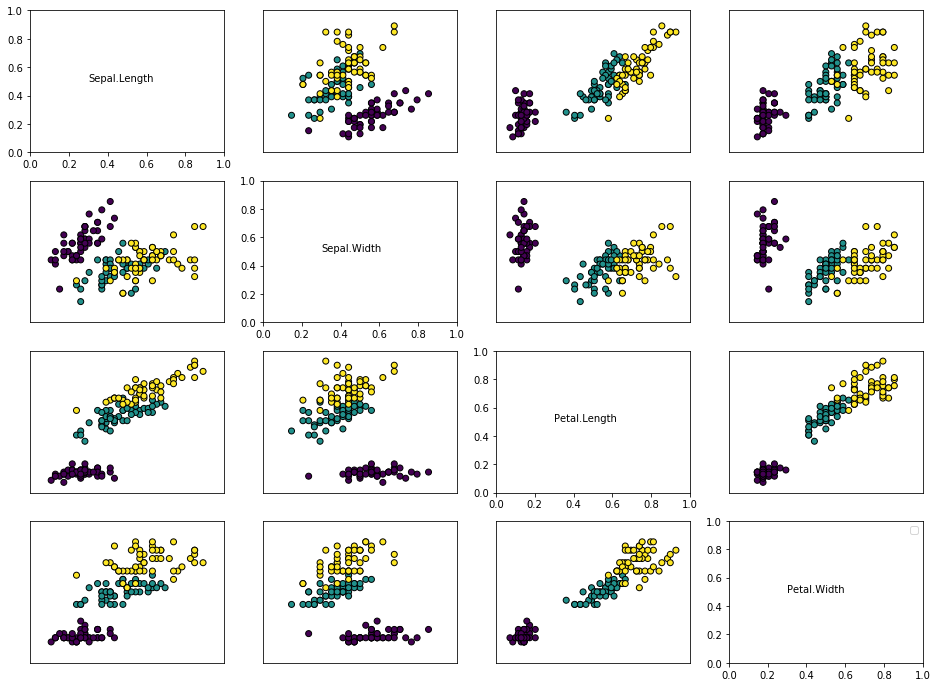

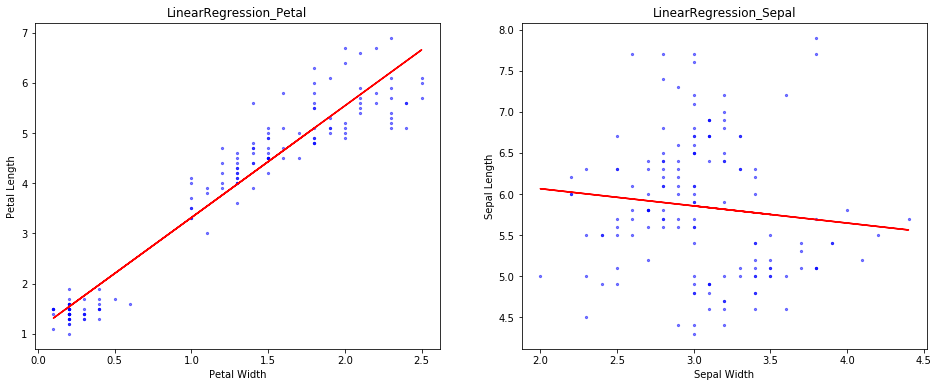

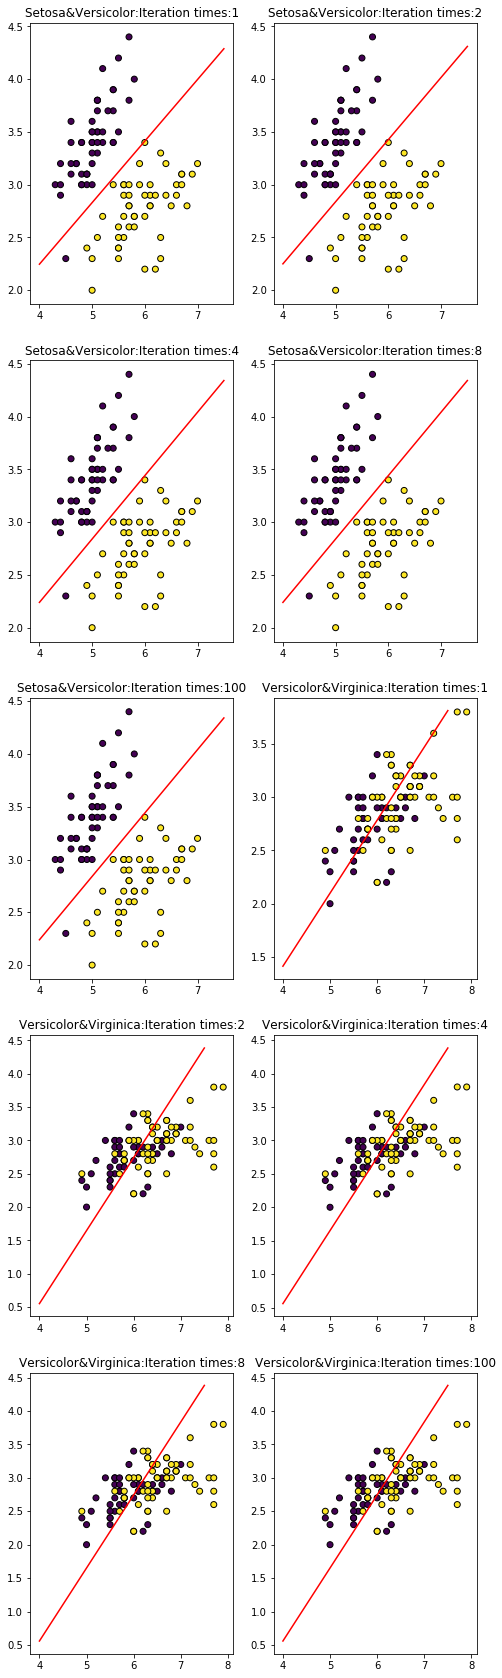

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target
subtitle=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

plt.figure(1, figsize=(16, 12))
plt.title('Iris Data(violet=setosa,green=versicolor,yellow=virginica)',fontsize='large',fontweight='bold')
for i in range(0,4):
    for j in range(0,4):
        plt.subplot(4,4,i*4+j+1)
        if(i!=j):
            x_min, x_max = X[:, i].min() - .5, X[:, i].max() + .5
            y_min, y_max = X[:, j].min() - .5, X[:, j].max() + .5
            #plt.clf() 
            # Plot the training points
            plt.scatter(X[:, j], X[:, i], c=y, 
                    edgecolor='k')
            #plt.xlabel('Sepal length')
            #plt.ylabel('Sepal width')
        
            plt.xlim(y_min, y_max)
            plt.ylim(x_min, x_max)
            plt.xticks(())
            plt.yticks(())
        if(i==j):
            plt.text(0.3,0.5,subtitle[i])
plt.legend(['setosa', 'virginica','versicolor'], loc = 'upper right')

# To do Linear Regression of Petal
fig = plt.figure(2, figsize=(16, 6))
plt.subplot(1,2,1)
model = LinearRegression(normalize=True)
xx = X[:, 3]
yy = X[:, 2]
xx = xx.reshape(-1, 1)
yy = yy.reshape(-1, 1)
model.fit(xx,yy)
train_score = model.score(xx, yy)
mse_petal = mean_squared_error(yy, model.predict(xx))
x_min, x_max = xx.min() - .5, xx.max() + .5
y_min, y_max = yy.min() - .5, yy.max() + .5
plt.title("LinearRegression_Petal")
#绘制散点图
plt.scatter(xx, yy, s=5, c='b', alpha=0.5)
#绘制拟合曲线
plt.plot(xx, model.predict(xx),'r-')
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
print("petal:trainscore:{};mean squared error: {}".format(train_score, mse_petal));

# To do Linear Regression of Sepal
plt.subplot(1,2,2)
model = LinearRegression(normalize=True)
xx = X[:, 1]
yy = X[:, 0]
xx = xx.reshape(-1, 1)
yy = yy.reshape(-1, 1)
model.fit(xx,yy)
train_score = model.score(xx, yy)
mse_sepal = mean_squared_error(yy, model.predict(xx))
x_min, x_max = xx.min() - .5, xx.max() + .5
y_min, y_max = yy.min() - .5, yy.max() + .5
plt.title("LinearRegression_Sepal")
#绘制散点图
plt.scatter(xx, yy, s=5, c='b', alpha=0.5)
#绘制拟合曲线
plt.plot(xx, model.predict(xx),'r-')
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
print("sepal:trainscore:{};mean squared error: {}".format(train_score, mse_sepal))

#To do LogisticRegression
fig = plt.figure(3, figsize=(8, 30))
m=[1,2,4,8,100]
xx=X[0:100,:2]
yy=y[0:100]
x_plot=np.linspace(4,7.5,100)
for i in range(0,5):
    plt.subplot(5,2,i+1)
    plt.title('Setosa&Versicolor:Iteration times:{}'.format(m[i]))
    model = LogisticRegression(solver='liblinear',max_iter=m[i])
    model.fit(xx,yy)
    #绘制散点图
    plt.scatter(xx[:, 0], xx[:, 1], c=yy, 
                    edgecolor='k')
    alpha = model.intercept_[0]
    beta1 = model.coef_[0][0]
    beta2 = model.coef_[0][1]
    beta=-beta1/beta2
    alpha=-alpha/beta2
    #绘制拟合曲线
    plt.plot(x_plot, beta*x_plot+alpha,'r-')

y_pred = model.predict(xx)
print('Setosa&Versicolor:match: {0}/{1}'.format(np.sum(np.equal(y_pred,yy)),yy.shape[0]))
print('function:y={}x+{}'.format(beta,alpha))

xx=X[50:150,:2]
yy=y[50:150]
for i in range(0,5):
    plt.subplot(5,2,i+6)
    plt.title('Versicolor&Virginica:Iteration times:{}'.format(m[i]))
    model = LogisticRegression(solver='liblinear',max_iter=m[i])
    model.fit(xx,yy)
    #绘制散点图
    plt.scatter(xx[:, 0], xx[:, 1], c=yy, 
                    edgecolor='k')
    alpha = model.intercept_[0]
    beta1 = model.coef_[0][0]
    beta2 = model.coef_[0][1]
    beta=-beta1/beta2
    alpha=-alpha/beta2
    #绘制拟合曲线
    plt.plot(x_plot, beta*x_plot+alpha,'r-')
y_pred = model.predict(xx)
print('Versicolor&Virginica:match: {0}/{1}'.format(np.sum(np.equal(y_pred,yy)),yy.shape[0]))
print('function:y={}x+{}'.format(beta,alpha))

plt.show()

# T1-1

如图所示，紫色表示setosa,绿色表示versicolor,黄色表示virginica。

显然可见，无论使用哪组特征，setosa与另外两个都是线性可分的。versicolor和virginica均不可完全线性分割，但是在选择Petal.Width和Petal.Length两组参量时比较容易做一个区分，选择别的参量则比较混杂。

# T1-2

从线性回归的可视化作图中可以看出，花瓣宽度和长度之间线性相关性较好，Petal这一组线性回归结果不错。花萼的宽度和长度之间线性相关性很差，Sepal这一组线性回归结果极差。从结果分析上看也非常明显：

|       |  score  |   mse   |
| :---: | :-----: | :-----: |
| petal | 0.92690 | 0.22605 |
| sepal | 0.01196 | 0.67297 |

# T1-3

最终分类结果（迭代1、2、4、8、100次）见运行结果，这个程序收敛很快，基本2次之后结果就非常稳定了。

需要注意的是，线性分类器的方程是bx1+bx2+a=0，处理成常见的斜截式才能用常见的方法绘制，我一开始画出来的线总是不对，两天没有想明白为什么

|      | 准确率 |       方程       |
| :--: | :----: | :--------------: |
| S&V  |  0.99  | y=0.6004x-0.1622 |
| V&V  |  0.69  | y=1.0927x-3.8128 |






